A ve B konumları için 0 Temiz'i ve 1 Kirli'yi göstermektedir. Yine başlangıçta süpürge rastele bir konuma yerleştirilerek temizlik yapılıyor

In [ ]:
import random

class Ortam(object):
    def __init__(self):
        # Anlık konumları ve koşulları
        # 0 Temiz'i ve Kirli'yi gösterir.
        self.KonumuDurumu = {'A': '0', 'B': '0'}
        # A ve B konumlarındaki koşulları rastgele belirleniyor
        self.KonumuDurumu['A'] = str(random.randint(0, 1))
        self.KonumuDurumu['B'] = str(random.randint(0, 1))

class BasitTepkiSupurmeEtmeni(Ortam):
    def __init__(self, Ortam):
        print(Ortam.KonumuDurumu)
        # Anlık Performans Ölçümü
        Performans = 0
        # Süpürgeyi rasgele bir konuma yerleştir
        SupurgeKonumu = random.randint(0, 1)
        # Eğer Süpürge A'da ise
        if SupurgeKonumu == 0:
            print("Süpürge A konumuna rastgele yerleştiriliyor")
            # ve A kirli ise
            if Ortam.KonumuDurumu['A'] == '1':
                print("A Konumu Kirli ise:")
                # Süpür ve Temiz işaretle
                Ortam.KonumuDurumu['A'] = '0'
                Performans += 1
                print("A Konumu temizlendi.")
            # Eğer B Kirli ise
            if Ortam.KonumuDurumu['B'] == '1':
                print("B konumuna Kirli ise")
                # B Konumu geç
                print("B konumuna geçiliyor")
                Performans -= 1
                # Süpür ve Temiz işaretle
                Ortam.KonumuDurumu['B'] = '0'
                Performans += 1
                print("B Konumu temizlendi.")
        else:
            # Eğer B kirli ise
            if Ortam.KonumuDurumu['B'] == '1':
                print("B Konumu Kirli ise")
                # Süpürge ve Temiz işaretle
                Ortam.KonumuDurumu['B'] = '0'
                Performans += 1
                print("B Konumu temizlendi.")
            # Eğer A Kirli ise
            if Ortam.KonumuDurumu['A'] == '1':
                print("Eğer A Konumu Kirli ise")
                # A'ya geç
                Performans -= 1
                print("A Konumuna geçiliyor")
                # Süpür ve Temiz işaretle
                Ortam.KonumuDurumu['A'] = '0'
                Performans += 1
                print("A Konumu temizlendi.")
        # Temizlik yapıldı
        print(Ortam.KonumuDurumu)
        print("Performans ölçümü: " + str(Performans))

SupurmeOrtami = Ortam()
SupurmeEtmeni = BasitTepkiSupurmeEtmeni(SupurmeOrtami)


{'A': '1', 'B': '0'}
Süpürge A konumuna rastgele yerleştiriliyor
A Konumu Kirli ise:
A Konumu temizlendi.
{'A': '0', 'B': '0'}
Performans ölçümü: 1


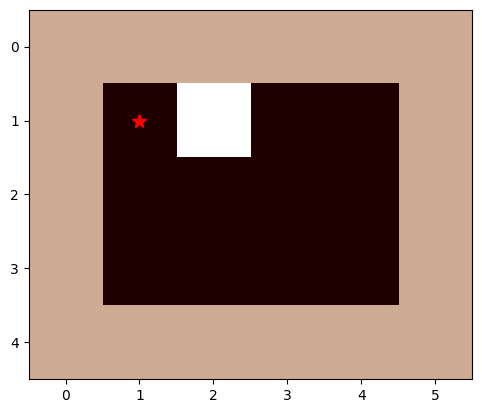

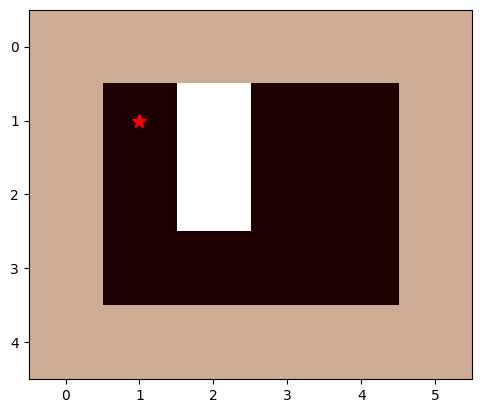

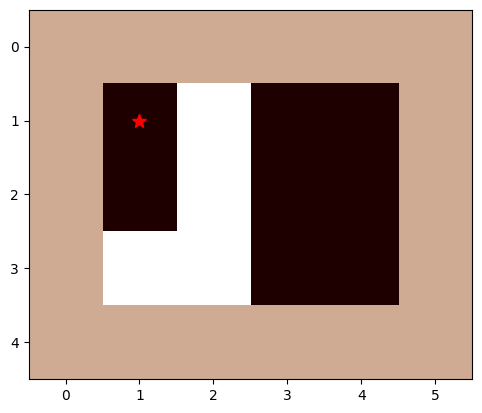

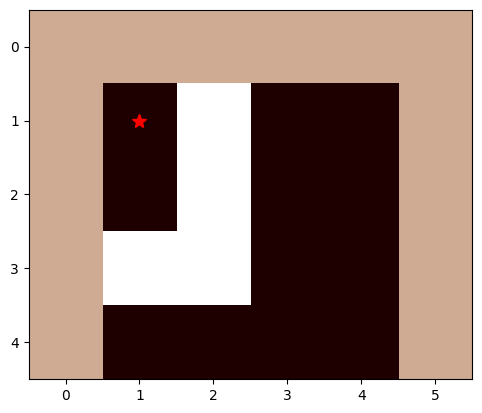

aşağı


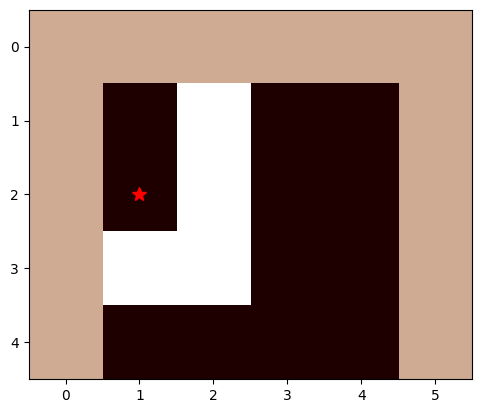

aşağı


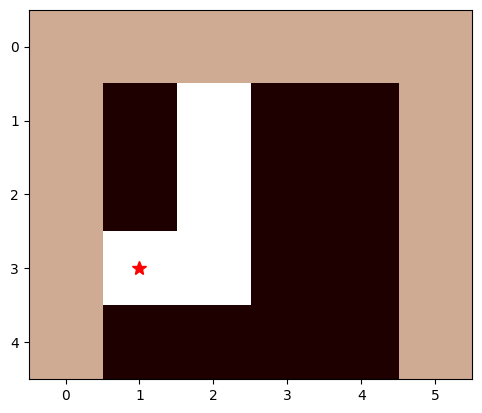

Temiz


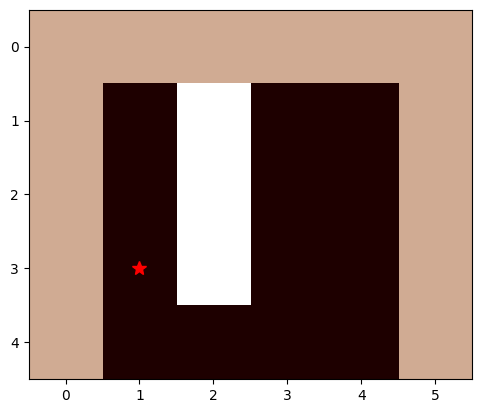

aşağı


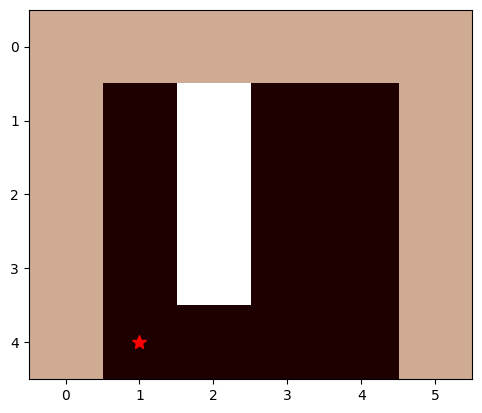

sağa


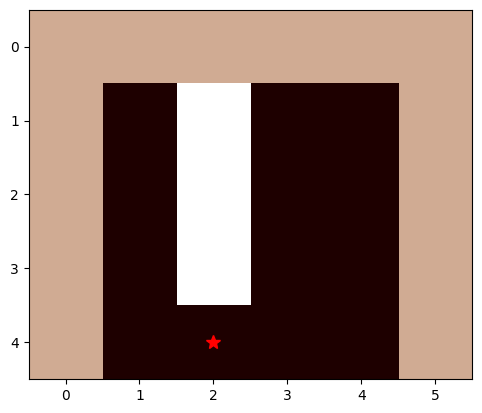

yukarı


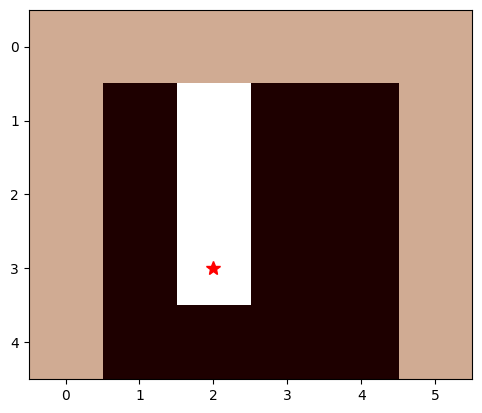

Temiz


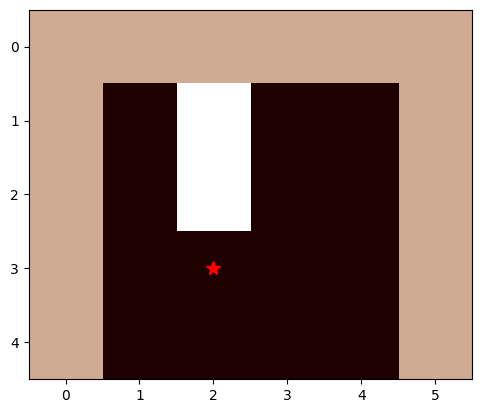

yukarı


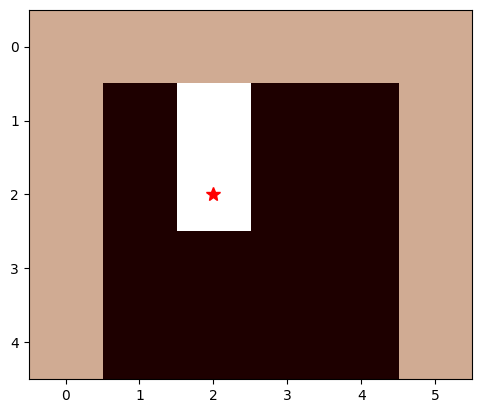

Temiz


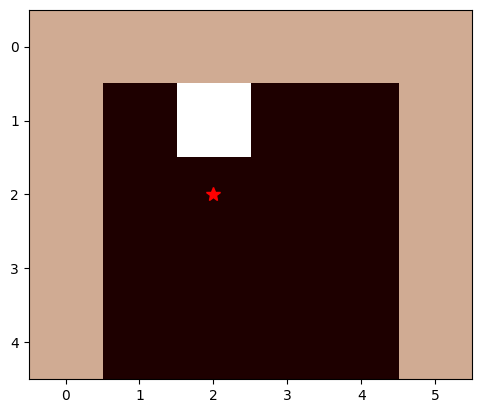

yukarı


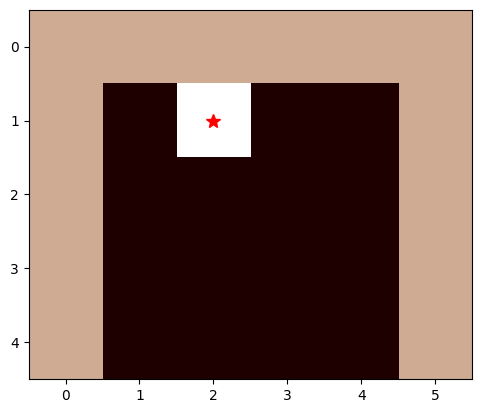

Temiz


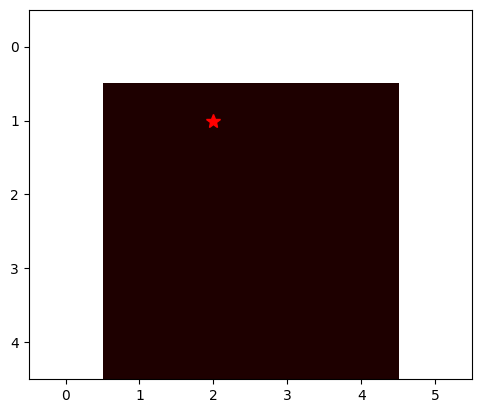

sağa


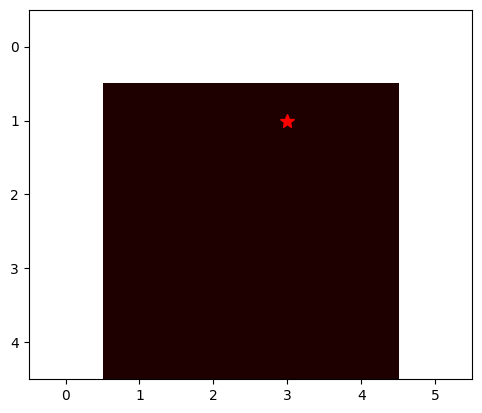

aşağı


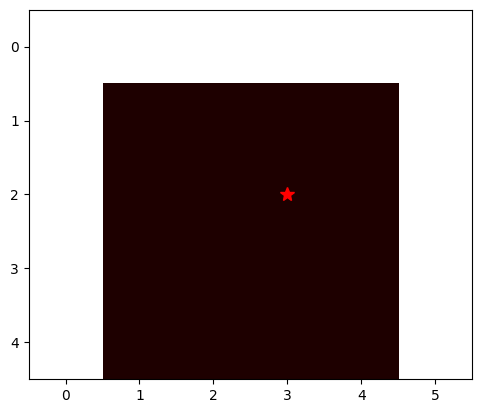

aşağı


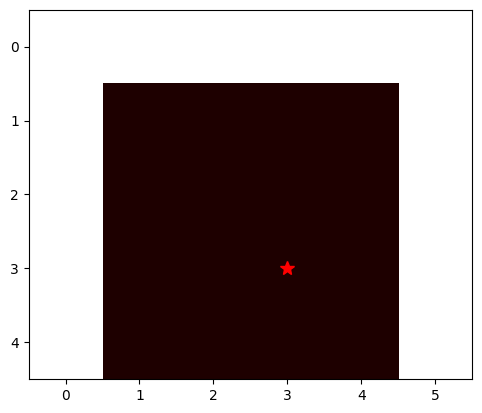

aşağı


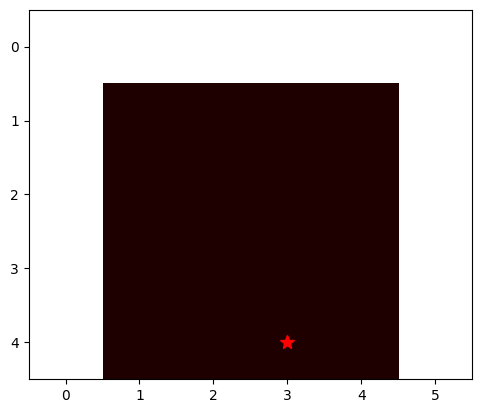

sağa


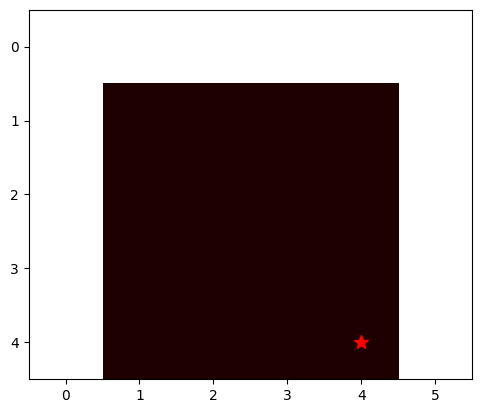

yukarı


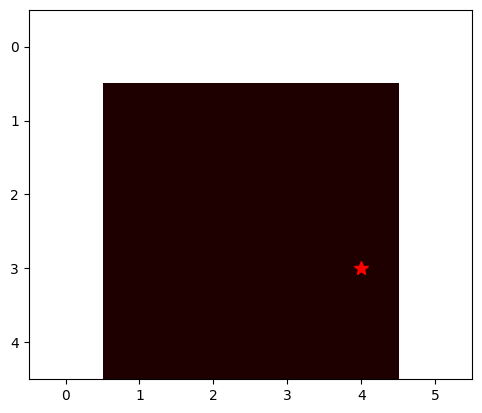

yukarı


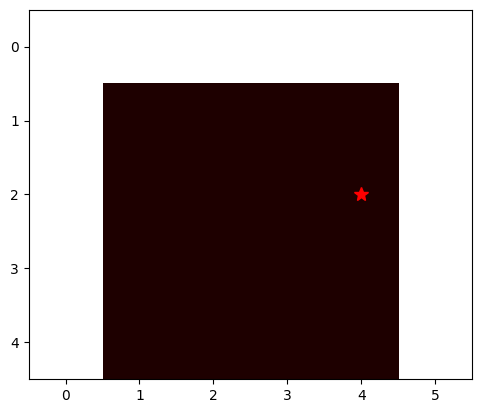

yukarı


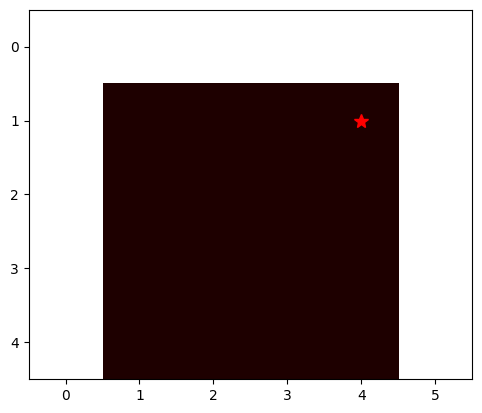

SON
0
0
0
0
0
0
0
0
0
0
0
0


<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import random

# 0-->Temiz
# 1--> Duvar
# 2--> Kirli
Matris = [
    [1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1]
]

# Eylemler Matris --> her poziyon için eylemi temsil eder
# Eylemler = yukarı (0), aşağı (1), sol (2), sağ (3), temiz(4), son(5)
EylemlerMatrisi = [
    [9, 9, 9, 9, 9, 9],
    [9, 1, 3, 1, 5, 9],
    [9, 1, 0, 1, 0, 9],
    [9, 1, 0, 1, 0, 9],
    [9, 3, 0, 3, 0, 9],
    [9, 9, 9, 9, 9, 9]
]

# Robot her zaman Matris [1][1]'de başlar
KonumSatirNo = 1
KonumSutunNo = 1

def MatrisCiz(Matris):
    plt.imshow(Matris, 'pink')
    plt.plot(KonumSutunNo, KonumSatirNo, '*r', markersize=10)  # Adjusted markersize
    plt.show(block=False)
    plt.pause(0.5)
    plt.clf()

def DunyaKur(m):
    for mI in range(1, 5):
        for aI in range(1, 5):
            number = random.randint(0, 3)
            m[mI][aI] = 2 if number == 1 else 0
        MatrisCiz(Matris)

def SonrakiEylemiBul(x, y):
    return EylemlerMatrisi[x][y]

# Hangi işlemin yapılacağına karar verir
# Eylemler = yukarı (0),aşağı(1), sol(2), sağ(3), temiz(4)
def BasitTepkiEtmeni(x, y):
    if Matris[x][y] == 2:  # kirliyse, temizleme işlemini döndür
        return 4
    return SonrakiEylemiBul(x, y)

def main():
    DunyaKur(Matris)
    global KonumSatirNo
    global KonumSutunNo
    while True:
        eylem = BasitTepkiEtmeni(KonumSatirNo, KonumSutunNo)
        if eylem == 0:  # yukarı git
            print("yukarı")
            KonumSatirNo -= 1  # satırı azalt
            MatrisCiz(Matris)
        elif eylem == 1:  # aşağı git
            print("aşağı")
            KonumSatirNo += 1  # satırı arttır
            MatrisCiz(Matris)
        elif eylem == 2:  # sola git
            print("sola")
            KonumSutunNo -= 1  # sutun azalt
            MatrisCiz(Matris)
        elif eylem == 3:  # sağa git
            print("sağa")
            KonumSutunNo += 1  # sutun arttır
            MatrisCiz(Matris)
        elif eylem == 4:  # temiz
            print("Temiz")
            Matris[KonumSatirNo][KonumSutunNo] = 0
            MatrisCiz(Matris)
        else:
            print("SON")
            break
    for i in range(1, len(Matris) - 1):
        for j in range(1, len(Matris[i]) - 1):
            print(Matris[i][j])  # matris'in boş olup olmadığını doğrular

if __name__ == "__main__":
    main()
